In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

print(f'tensorflow version : {tf.__version__}')
print(f'tensorflow dataset version : {tfds.__version__}')

tensorflow version : 2.12.0
tensorflow dataset version : 4.8.3


# TensorFlow dataset 리스트

In [4]:
print(f'tensorflow에 내장된 dataset : {len(tfds.list_builders())}개')
for i, data in enumerate(tfds.list_builders(),1):
    print(f'{i}. {data}')
    if i == 5:
        break

tensorflow에 내장된 dataset : 1138개
1. abstract_reasoning
2. accentdb
3. aeslc
4. aflw2k3d
5. ag_news_subset


# **CelebA 데이터셋**

 * [Large-scale CelebFaces Attributes (CelebA) Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)
 > CelebFaces Attributes Dataset(CelebA)는 각각 40개의 속성 주석이 있는 200,000개 이상의 유명인 이미지가 포함된 대규모 얼굴 속성 데이터셋입니다. 이 데이터 세트의 이미지는 큰 포즈 변형과 배경 혼란을 다룹니다. CelebA는 - 10,177개의 ID, - 202,599개의 얼굴 이미지, - 5개의 랜드마크 위치, 이미지당 40개의 이진 속성 주석을 포함하여 다양한, 대량 및 풍부한 주석을 가지고 있습니다. ([TensorFlow 공식 사이트](https://www.tensorflow.org/datasets/catalog/celeb_a?hl=ko))
 * Features
    * image : 유명 인사의 얼굴 사진
    * attributes : 속성(사진에 보이는 인물의 특징 ex. 머리카락, 표정, 성별 등)
    * landmarks : 얼굴 위치(ex. 눈, 코, 입 등 좌표(x,y))

## **STEP1. 데이터 호출 : `tfds.builder()`**

In [20]:
celebA_bldr = tfds.builder('celeb_a')
print(f'{"-" * 80}\n[DATA DESCRIPTION]\n{"-" * 80}\n{celebA_bldr.info.description}')
print()
print(f'{"-" * 80}\n[DATA FEATURES] - {celebA_bldr.info.features.keys()}\n{"-" * 80}')
print(celebA_bldr.info.features)          # 딕셔너리(dictionary)로 표현되는 것을 알 수 있다.

--------------------------------------------------------------------------------
[DATA DESCRIPTION]
--------------------------------------------------------------------------------
CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset
with more than 200K celebrity images, each with 40 attribute annotations. The
images in this dataset cover large pose variations and background clutter.
CelebA has large diversities, large quantities, and rich annotations,
including - 10,177 number of identities, - 202,599 number of face images, and -
5 landmark locations, 40 binary attributes annotations per image.

The dataset can be employed as the training and test sets for the following
computer vision tasks: face attribute recognition, face detection, and landmark
(or facial part) localization.

Note: CelebA dataset may contain potential bias. The fairness indicators
[example](https://www.tensorflow.org/responsible_ai/fairness_indicators/tutorials/Fairness_Indicators_TFCO_C

## **STEP2. 데이터 다운로드 : `download_and_prepare()`**

> **<h3>Error!</h3>**
Failed to get url https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3931cqiv2mcqt1nsdgvig77ejjjg5pp9/1682215875000/13182073909007362810/*/0B7EVK8r0v71pZjFTYXZWM3FlRnM?e=download&uuid=538d99be-4310-4651-ab2d-63f80c927eeb. HTTP code: 429.

> **<h3>Solution</h3>**
[Fairness Indicators TFCO CelebA Case Study.ipynb](https://colab.research.google.com/github/tensorflow/fairness-indicators/blob/master/g3doc/tutorials/Fairness_Indicators_TFCO_CelebA_Case_Study.ipynb#scrollTo=zCSemFST0b89)

In [34]:
gcs_base_dir = "gs://celeb_a_dataset/"
celebA_bldr = tfds.builder("celeb_a", data_dir=gcs_base_dir, version='2.0.0')

celebA_bldr.download_and_prepare()

## **STEP3. 데이터셋 생성 : `as_dataset()`**

### **datasets 구조 살피기**

In [39]:
datasets = celebA_bldr.as_dataset(shuffle_files=False)
print(f'dataset 구조: {type(datasets)}')
print(datasets.keys())

dataset 구조: <class 'dict'>
dict_keys(['test', 'train', 'validation'])


In [64]:
ds_train = datasets['train']
ds_train_1st = next(iter(ds_train))
print(f'train 데이터 구조: {type(ds_train_1st)}')
print(ds_train_1st.keys())

train 데이터 구조: <class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


In [55]:
print('[image의 크기]')
print(ds_train_1st['image'].shape)
print('[attributes 의 요소]')
print(ds_train_1st['attributes'].keys())
print('[landamrks 의 요소]')
print(ds_train_1st['landmarks'].keys())

[image의 크기]
(218, 178, 3)
[attributes 의 요소]
dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])
[landamrks 의 요소]
dict_keys(['lefteye_x', 'lefteye_y', 'leftmouth_x', 'leftmouth_y', 'nose_x', 'nose_y', 'righteye_x', 'righteye_y', 'rightmouth_x', 'rightmouth_y'])


### **데이터 일부분 시각화**

#### EX1. 처음 20개 이미지를 나타내는데 이때의 label은 Male/Female로 나타낸다.

In [56]:
print('데이터 변형 : 딕셔너리 -> 튜플')
ds_train = datasets['train']
ds_train = ds_train.map(lambda dic: (dic['image'], dic['attributes']['Male'])).batch(20)
ds_train_1st = next(iter(ds_train))

데이터 변형 : 딕셔너리 -> 튜플


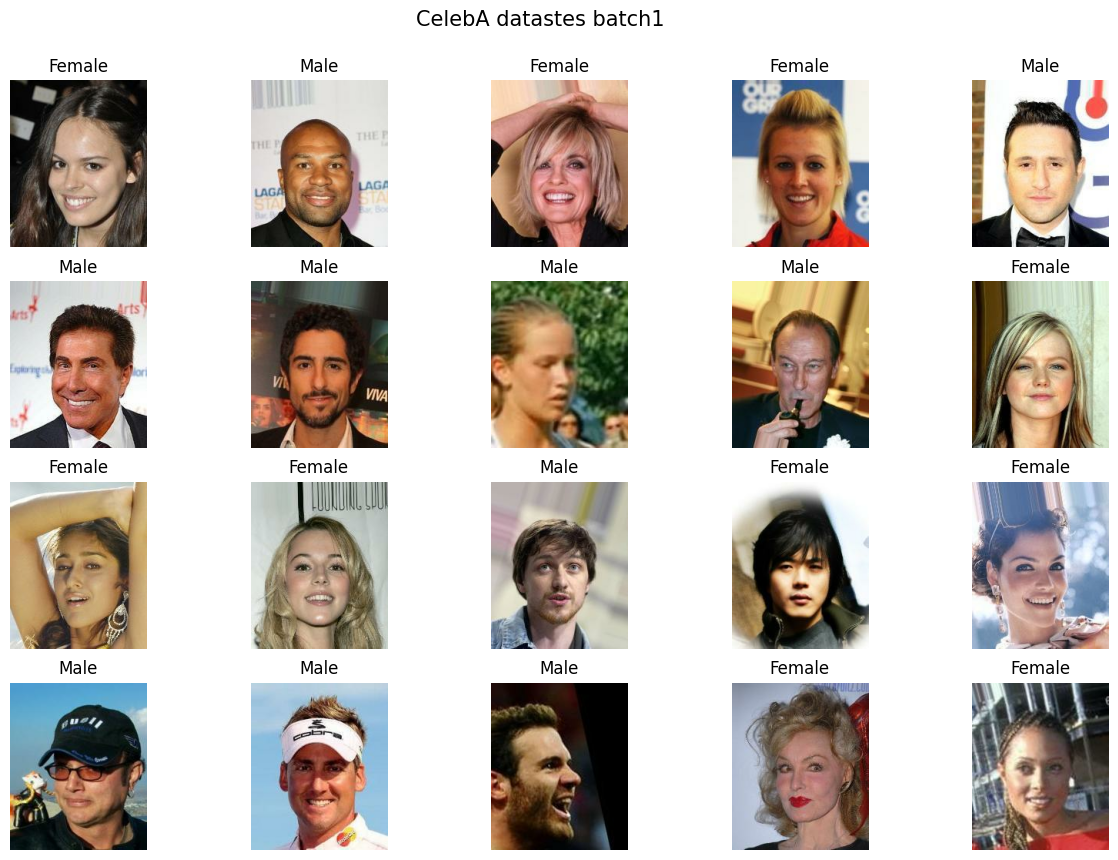

In [62]:
import matplotlib.pyplot as plt 

images, labels = ds_train_1st

fig = plt.figure(figsize=(15, 10))
r = 0
for i, (image, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(4, 5, i+1)
    ax.imshow(image)
    ax.set_title("Male" if label == True else "Female")
    ax.axis('off')
plt.suptitle('CelebA datastes batch1', size=15, y=0.95)
    
plt.show()

#### EX2. 위 이미지의 다음 20개 이미지를 나타내는데 이때의 label은 Smiling/UnSmiling으로 나타낸다.

In [72]:
print('데이터 변형 : 딕셔너리 -> 튜플')
ds_train = datasets['train']
ds_train = ds_train.map(lambda dic: (dic['image'], dic['attributes']['Smiling'])).batch(20)
ir = iter(ds_train)
ds_train_1st = next(ir)
ds_train_2nd = next(ir)

데이터 변형 : 딕셔너리 -> 튜플


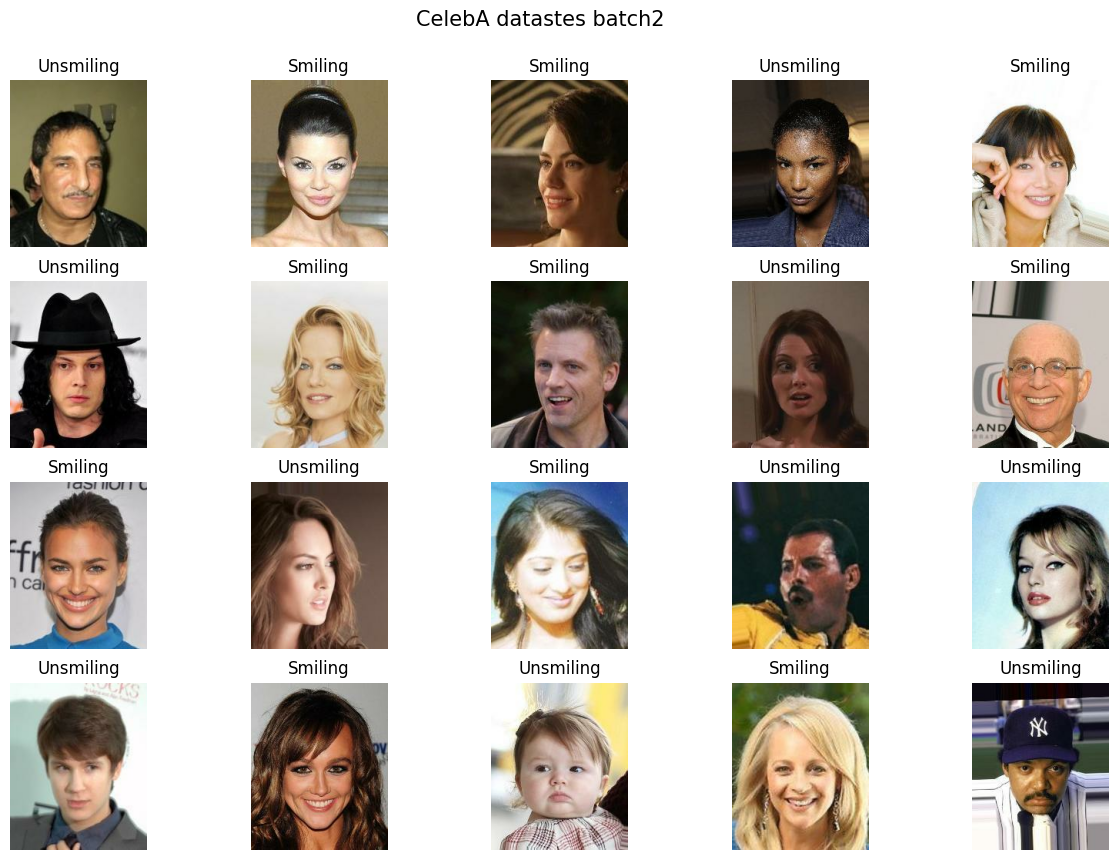

In [75]:
import matplotlib.pyplot as plt 

images, labels = ds_train_2nd

fig = plt.figure(figsize=(15, 10))
r = 0
for i, (image, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(4, 5, i+1)
    ax.imshow(image)
    ax.set_title("Smiling" if label == True else "Unsmiling")
    ax.axis('off')
plt.suptitle('CelebA datastes batch2', size=15, y=0.95)
    
plt.show()